In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

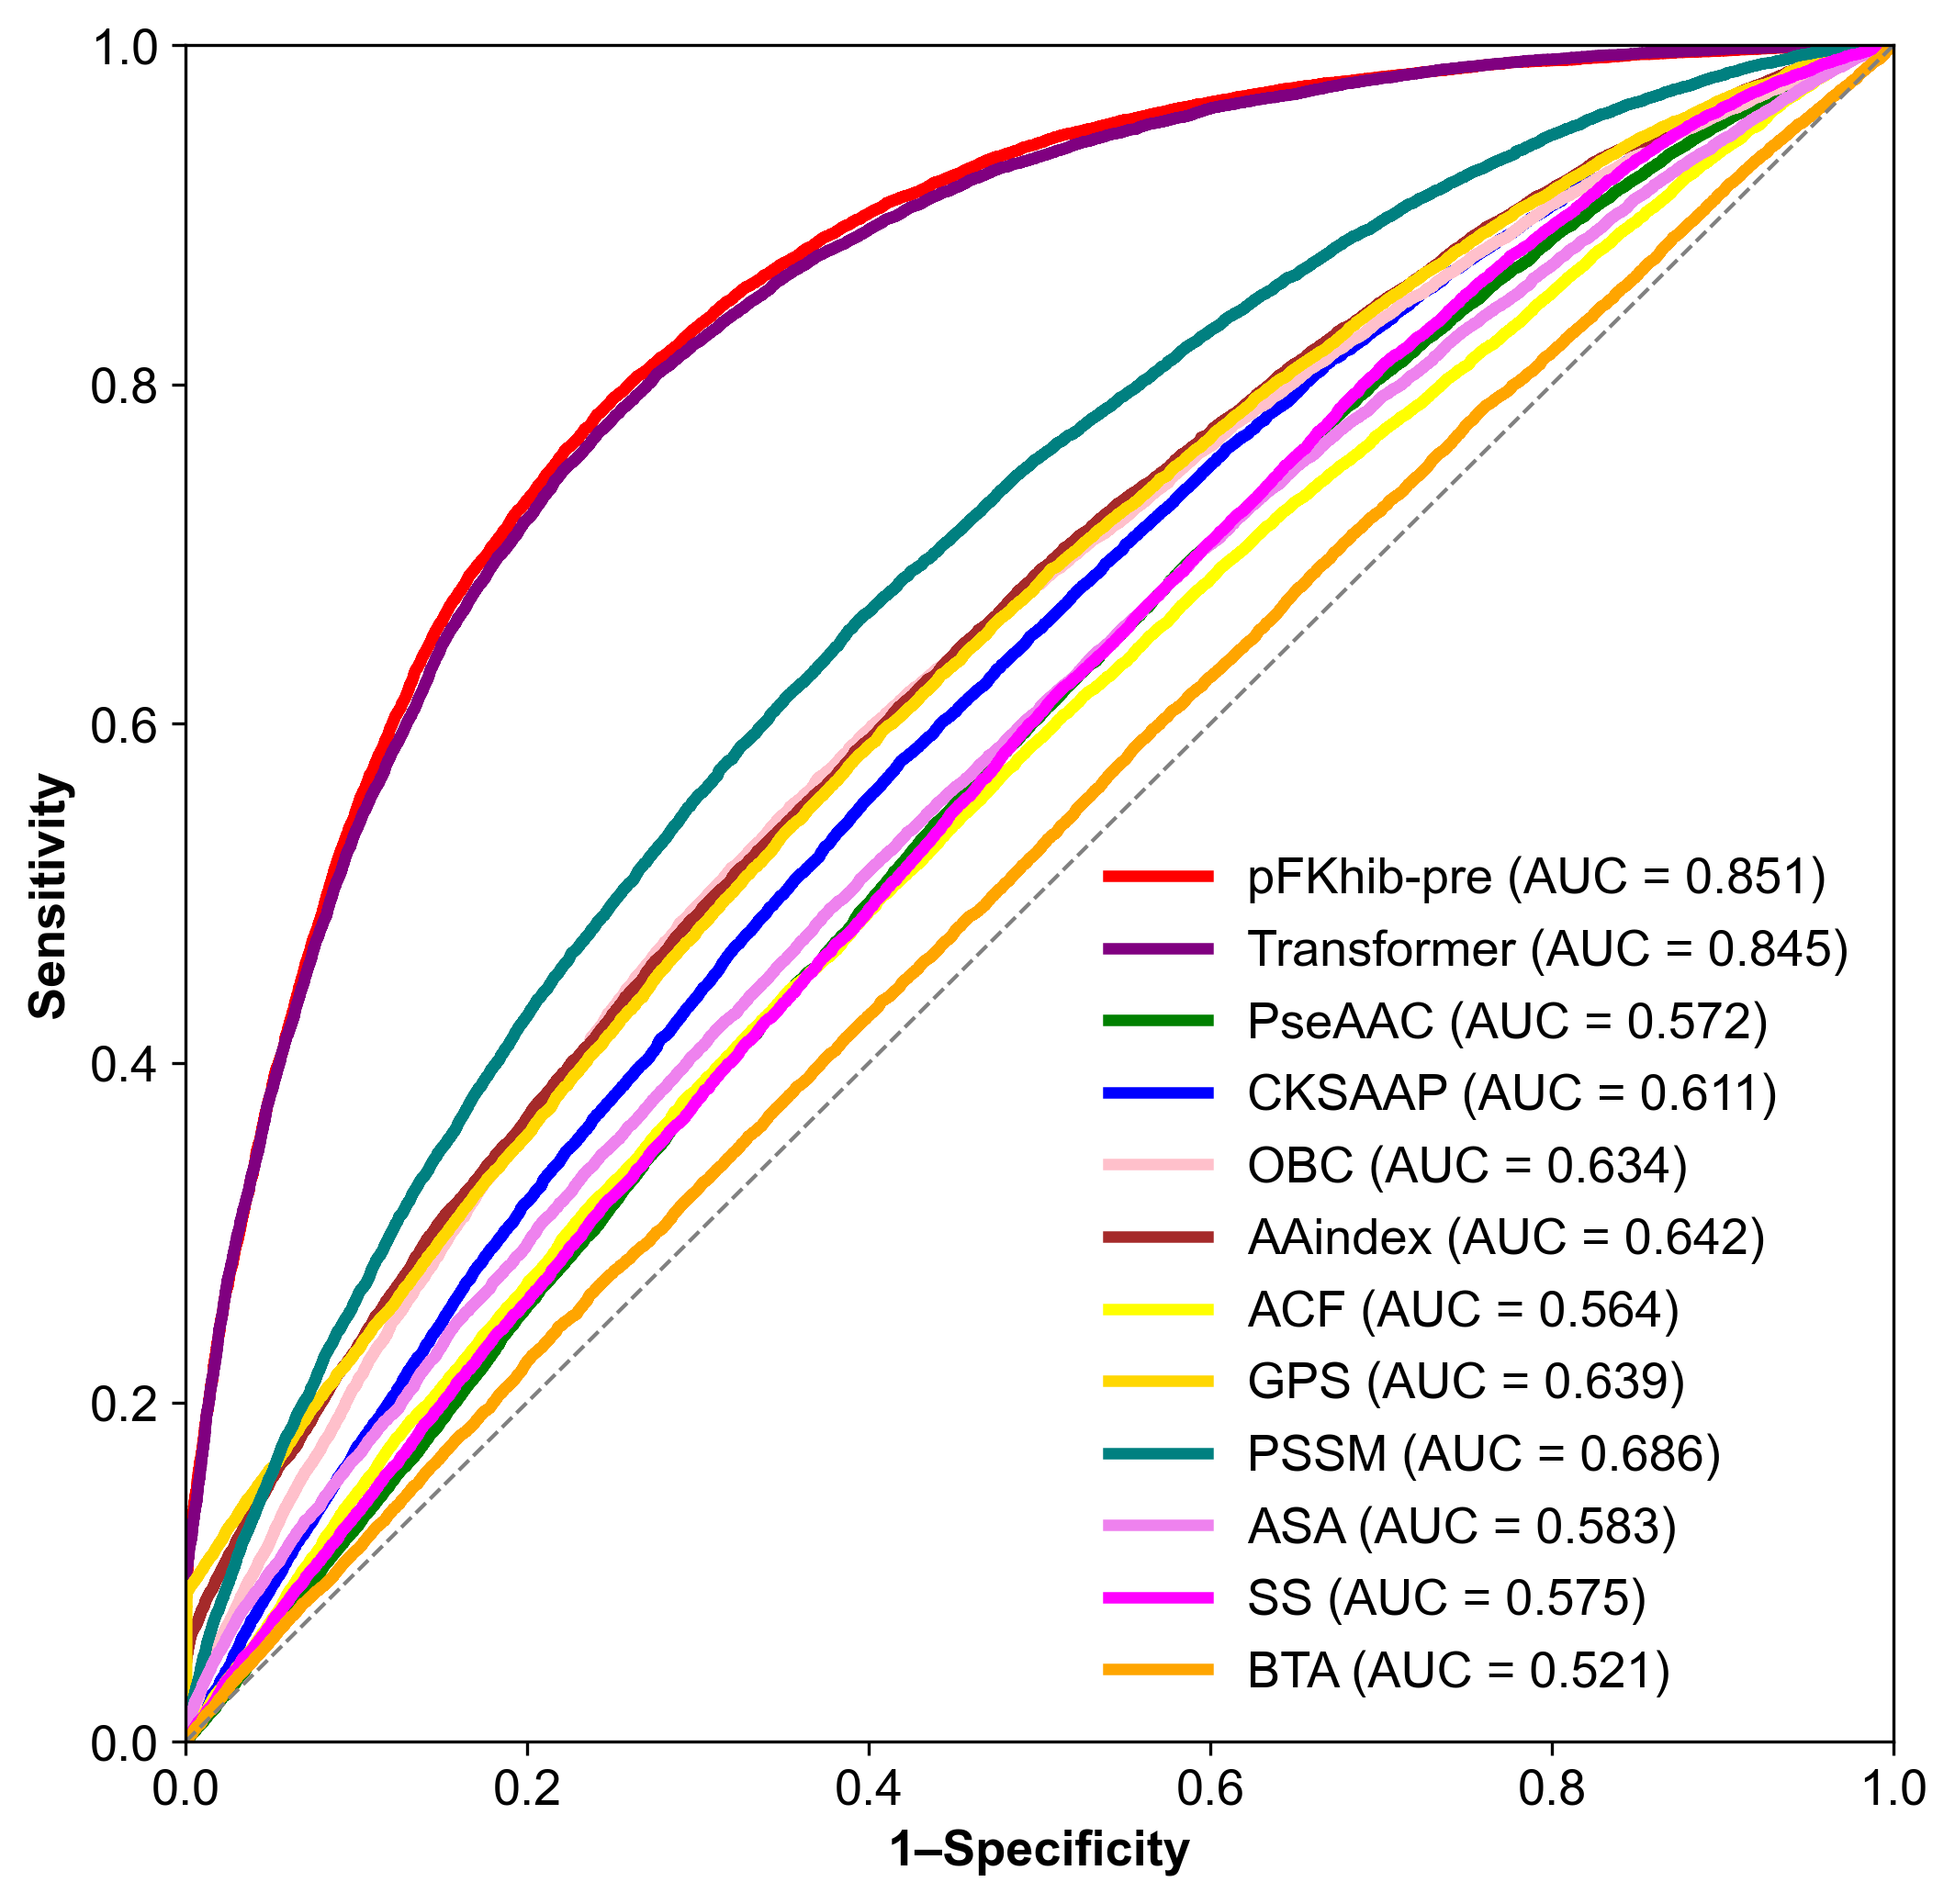

In [7]:
#draw_ROC
df_iDNN = pd.read_csv('E:/NingLab/object/khib/models/integrated_DNN/iDNN_y_label&score.csv')
label = df_iDNN['label']
score = df_iDNN['score']
iDNN_fpr, iDNN_tpr, iDNN_threshold = roc_curve(label, score)
iDNN_auc = auc(iDNN_fpr, iDNN_tpr)
font = {'family': 'arial',
        'weight': 'bold',
        'size': 13}
params = {'axes.labelsize': '20',
          'xtick.labelsize': '20',
          'ytick.labelsize': '20',
          'lines.linewidth': '4'}
pylab.rcParams.update(params)
pylab.rcParams['font.family'] = 'sans-serif'
pylab.rcParams['font.sans-serif'] = ['Arial']
#pylab.rcParams['font.weight'] = 'bold'
plt.figure(figsize=(8, 8), dpi=300)

plt.plot(iDNN_fpr, iDNN_tpr, linewidth='3', label='pFKhib-pre (AUC = %.3f)' % iDNN_auc, color='red')

feature_list = ['Transformer', 'PseAAC', 'CKSAAP', 'OBC', 'AAindex', 'ACF', 'GPS', 'PSSM', 'ASA', 'SS', 'BTA']
color_list = ['purple', 'green', 'blue', 'pink', 'brown', 'yellow', 'gold', 'teal', 'violet', 'magenta', 'orange']
modelname = 'DNN'
for i, featurename in enumerate(feature_list):
    if featurename != 'Transformer':
        df = pd.read_csv(f'E:/NingLab/object/khib/models/%s/%s/%s_y_label&score.csv' % (modelname, str.lower(featurename), str.lower(featurename)))
    else:
        df = pd.read_csv(f'E:/NingLab/object/khib/models/%s/%s/%s_y_label&score.csv' % (modelname, str.upper(featurename), str.upper(featurename)))
    label_array = df['label']
    score_array = df['score']
    DNN_fpr, DNN_tpr, DNN_threshold = roc_curve(label_array, score_array)
    DNN_auc = auc(DNN_fpr, DNN_tpr)
    plt.plot(DNN_fpr, DNN_tpr, linewidth='3', label=f'%s (AUC = %.3f)' % (featurename, DNN_auc), color=color_list[i])
    #precision, recall, _ = precision_recall_curve(label_array, score_array)
    #auc_score_array = auc(recall, precision)

plt.plot([0, 1], [0, 1], linewidth='1', color='grey', linestyle="--")
plt.yticks(np.linspace(0, 1, 6), size=13)
plt.xticks(np.linspace(0, 1, 6), size=13)
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.legend(prop={'size': 13}, loc="lower right", frameon=False)
#plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.2)
plt.xlabel('1–Specificity', font)
plt.ylabel('Sensitivity', font)
#plt.legend(loc="lower right")  # 显示图例并指定图例位置
plt.savefig('E:/NingLab/object/khib/models/DNN/Khib-pre_AUC1.png', dpi=300)
plt.savefig('E:/NingLab/object/khib/models/DNN/Khib-pre_AUC1.pdf', format='pdf')
plt.show()